# Basic Image Classification using Tensorflow

Welcome to Basic Image Classification with Tensorflow

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of hand written digit as input and predicts the class of that digit, that is , it predicts the digit or it predicts the class of the input image

![Hand Written Digits Classification](resources/1_1.png)

## Library imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import logging

%matplotlib inline
tf.get_logger().setLevel(logging.ERROR)

## Load the Dataset

In [21]:
# Import MNIST

from tensorflow.keras.datasets import mnist

# helper function load data in mnist returns training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# Shapes of the imported arrays
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (60000, 28, 28)
y_train shape = (60000,)
X_test shape = (10000, 28, 28)
y_test shape = (10000,)


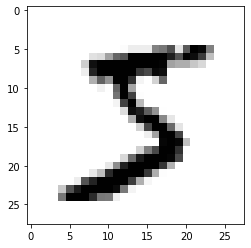

The corresponding label is - 5


In [23]:
# Plot an image example

plt.imshow(X_train[0], cmap='binary')
plt.show()

print(f"The corresponding label is - {y_train[0]}")

In [24]:
# Check all the unique available labels

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## One Hot Encoding

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

In [25]:
# Perform the encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(f"Shape of encoded y_train - {y_train_encoded.shape}")
print(f"Shape of encoded y_test - {y_test_encoded.shape}")

Shape of encoded y_train - (60000, 10)
Shape of encoded y_test - (10000, 10)


In [26]:
# Check encoded label
y_train_encoded[0] # it should correspond to label 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Basics of Neural Networks

### Linear Equations

![Single Neuron](resources/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](resources/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](resources/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

## Preprocessing the Examples
Unrolling N-dimensional Arrays to Vectors

In [27]:
# We will need to reshape the feature array set
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

print(f"Shape pf X_train_reshaped - {X_train_reshaped.shape}")
print(f"Shape pf X_test_reshaped - {X_test_reshaped.shape}")

Shape pf X_train_reshaped - (60000, 784)
Shape pf X_test_reshaped - (10000, 784)


## Data Normalization

In [28]:
# Perform the normalization
X_mean = np.mean(X_train_reshaped)
X_std = np.std(X_train_reshaped)

epsilon = 1e-10

X_train_norm = (X_train_reshaped - X_mean)/(X_std + epsilon)
X_test_norm = (X_test_reshaped - X_mean) / (X_std + epsilon)

In [29]:
# Display the first normalized value
print(set(X_train_norm[0])) # Just the unique values

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

## Creating the Model

In [30]:
model = Sequential([
    Dense(128, input_shape=(X_train_norm.shape[1], ), activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

### Compiling the model

In [31]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
                    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [32]:
# Fit the model for 10 epochs
model.fit(X_train_norm, y_train_encoded, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.5926 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1899 - accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.1421 - accuracy: 0.9583
Epoch 4/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.1176 - accuracy: 0.9656
Epoch 5/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.0951 - accuracy: 0.9730
Epoch 6/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.0806 - accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.0694 - accuracy: 0.9806
Epoch 8/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.0617 - accuracy: 0.9827
Epoch 9/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.0562 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 1s 661us/

### Evaluating the model

In [33]:
loss, accuracy = model.evaluate(X_test_norm, y_test_encoded)
print(f"Test Set Accuracy - {accuracy}")

313/313 [==============================] - 0s 539us/step - loss: 0.0822 - accuracy: 0.9747
Test Set Accuracy - 0.9746999740600586


## Predictions

In [34]:
# Predictions on test set

preds = model.predict(X_test_norm)

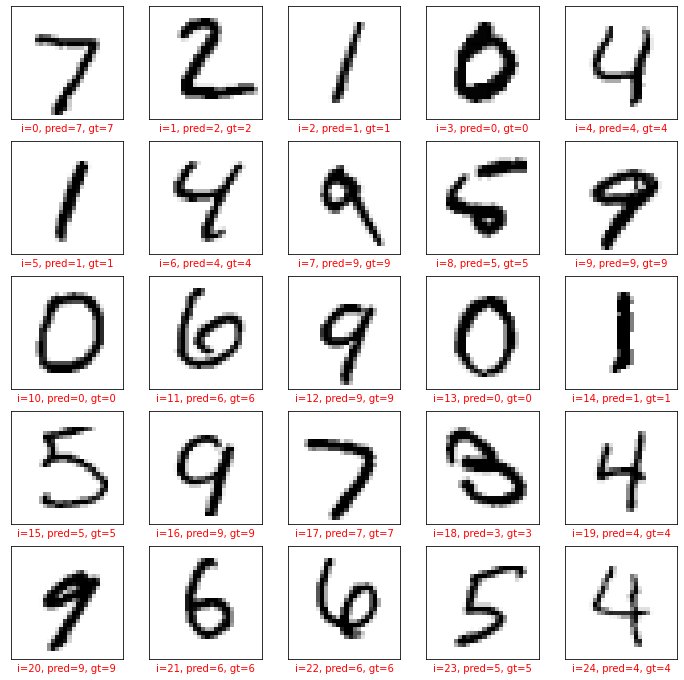

In [35]:
# Plotting the results
plt.figure(figsize=(12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]

    col = 'g'
    if pred != 'gt':
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='binary')

plt.show()